In [66]:
import matplotlib.pyplot as plt
from skimage.data import astronaut
from skimage.color import rgb2gray, hsv2rgb
from skimage.io import imread
from scipy.signal import correlate2d
import numpy as np

cameraman = imread('data/cameraman.jpg')
peppers = imread('data/peppers.png')
astronaut_grayscale = rgb2gray(astronaut())

In [101]:
normalize = lambda image: (image - np.min(image)) / (np.max(image) - np.min(image))

def sobel_prewitt_detector(maskx, masky):
    def detector(image):
        Gx = correlate2d(image, maskx)
        Gy = correlate2d(image, masky)
        magnitude = np.sqrt(Gx**2 + Gy**2)
        magnitude = normalize(magnitude)
        angle = np.arctan2(Gx,Gy)
        return magnitude, angle
    return detector

sobelx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sobely = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

prewittx = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
prewitty = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])

sobel_detector = sobel_prewitt_detector(sobelx, sobely)
prewitt_detector = sobel_prewitt_detector(prewittx, prewitty)


# converts the angle images
# to HSV and then to RGB
def visualize_angle(angle):
    hsv = np.ones((*angle.shape, 3))
    hsv[:,:,0] = angle + np.pi
    return hsv2rgb(hsv)

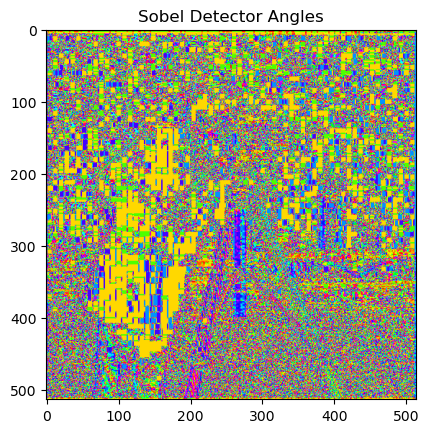

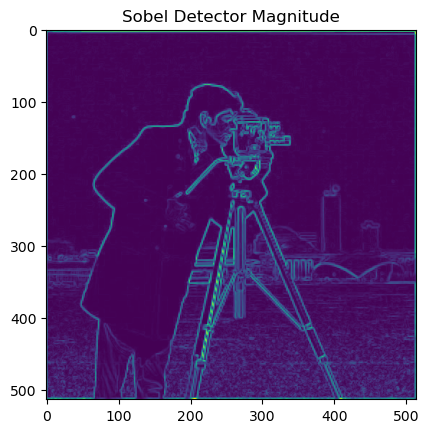

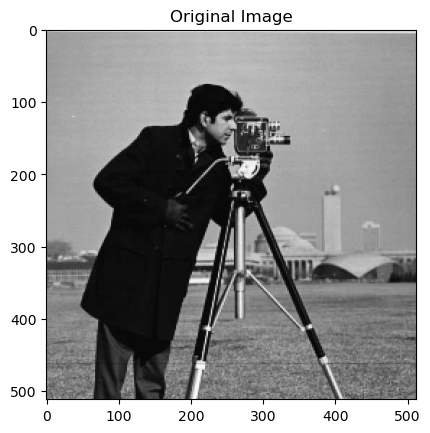

In [102]:
mag, angle = sobel_detector(cameraman)

plt.imshow(visualize_angle(angle))
plt.title('Sobel Detector Angles')
plt.show()
plt.imshow(mag)
plt.title('Sobel Detector Magnitude')
plt.show()
plt.imshow(cameraman, cmap='gray')
plt.title('Original Image')
plt.show()



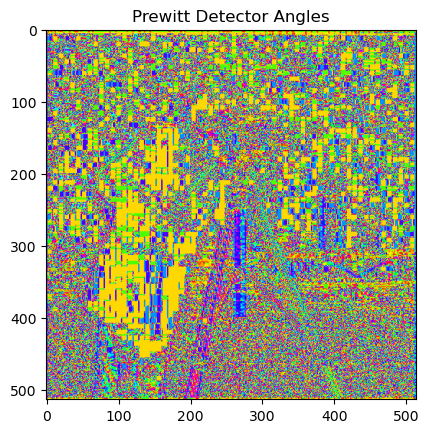

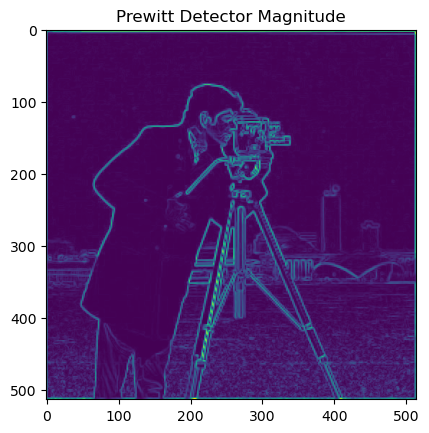

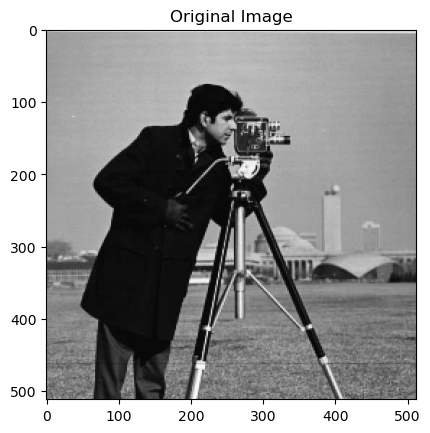

In [104]:
mag, angle = prewitt_detector(cameraman)

plt.imshow(visualize_angle(angle))
plt.title('Prewitt Detector Angles')
plt.show()
plt.imshow(mag)
plt.title('Prewitt Detector Magnitude')
plt.show()
plt.imshow(cameraman, cmap='gray')
plt.title('Original Image')
plt.show()